# Fastai demo

In [1]:
from fastai.data.all import *
from fastai.vision.all import *

In [2]:
path = untar_data(URLs.CAMVID_TINY)

In [3]:
!ls {path}

codes.txt  images  labels


In [4]:
!ls {path}/labels

0001TP_006750_P.png  0016E5_01500_P.png  0016E5_08550_P.png
0001TP_006840_P.png  0016E5_01920_P.png  Seq05VD_f00000_P.png
0001TP_007500_P.png  0016E5_02250_P.png  Seq05VD_f00090_P.png
0001TP_007860_P.png  0016E5_05190_P.png  Seq05VD_f00210_P.png
0001TP_008070_P.png  0016E5_05310_P.png  Seq05VD_f00420_P.png
0001TP_008160_P.png  0016E5_05730_P.png  Seq05VD_f00480_P.png
0001TP_008400_P.png  0016E5_05940_P.png  Seq05VD_f00810_P.png
0001TP_008580_P.png  0016E5_06090_P.png  Seq05VD_f00990_P.png
0001TP_008670_P.png  0016E5_06240_P.png  Seq05VD_f01080_P.png
0001TP_008700_P.png  0016E5_06300_P.png  Seq05VD_f01260_P.png
0001TP_008760_P.png  0016E5_06570_P.png  Seq05VD_f01320_P.png
0001TP_008940_P.png  0016E5_06810_P.png  Seq05VD_f01440_P.png
0001TP_009000_P.png  0016E5_06870_P.png  Seq05VD_f01830_P.png
0001TP_009150_P.png  0016E5_06990_P.png  Seq05VD_f01890_P.png
0001TP_009360_P.png  0016E5_07290_P.png  Seq05VD_f01950_P.png
0001TP_009840_P.png  0016E5_07973_P.png  Seq05VD_f02070_P.png
0001TP_009

In [5]:
fnames = get_image_files(path/'images')

In [6]:
def label_func(x): return path/'labels'/f'{x.stem}_P{x.suffix}'
codes = np.loadtxt(path/'codes.txt', dtype=str)
    
dls = SegmentationDataLoaders.from_label_func(path, fnames, label_func, codes=codes)

/home/hliang16/anaconda3/envs/main/lib/python3.9/site-packages/torch/_tensor.py:1142: UserWarning: __floordiv__ is deprecated, and its behavior will change in a future version of pytorch. It currently rounds toward 0 (like the 'trunc' function NOT 'floor'). This results in incorrect rounding for negative values. To keep the current behavior, use torch.div(a, b, rounding_mode='trunc'), or for actual floor division, use torch.div(a, b, rounding_mode='floor').
  ret = func(*args, **kwargs)


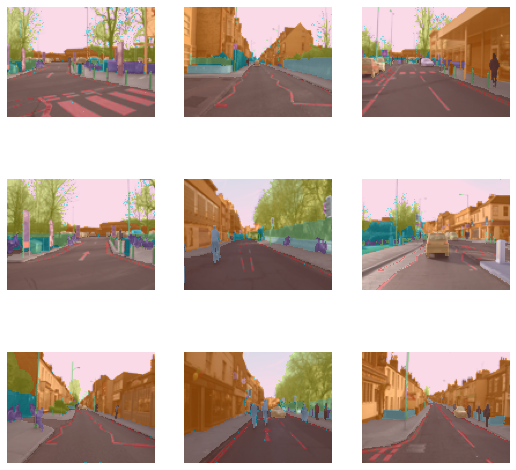

In [7]:
dls.show_batch()

In [8]:
np.loadtxt(path/'codes.txt', dtype=str)

array(['Animal', 'Archway', 'Bicyclist', 'Bridge', 'Building', 'Car',
       'CartLuggagePram', 'Child', 'Column_Pole', 'Fence', 'LaneMkgsDriv',
       'LaneMkgsNonDriv', 'Misc_Text', 'MotorcycleScooter', 'OtherMoving',
       'ParkingBlock', 'Pedestrian', 'Road', 'RoadShoulder', 'Sidewalk',
       'SignSymbol', 'Sky', 'SUVPickupTruck', 'TrafficCone',
       'TrafficLight', 'Train', 'Tree', 'Truck_Bus', 'Tunnel',
       'VegetationMisc', 'Void', 'Wall'], dtype='<U17')

In [9]:
camvid = DataBlock(blocks=(ImageBlock, MaskBlock(codes = np.loadtxt(path/'codes.txt', dtype=str))),
    get_items=get_image_files,
    splitter=RandomSplitter(),
    get_y=lambda o: path/'labels'/f'{o.stem}_P{o.suffix}',
    batch_tfms=aug_transforms())

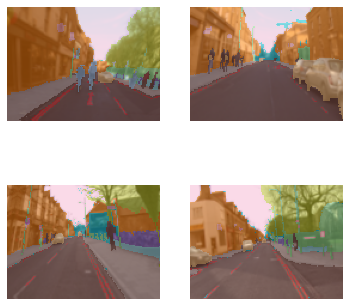

In [10]:
dls = camvid.dataloaders(path/"images", bs=4)
dls.show_batch()

In [11]:
x, y= dls.train.one_batch()

In [12]:
x = np.array(x.cpu())
y = np.array(y.cpu())

In [13]:
x.min(), x.max()

(0.006201348, 0.9999999)

In [14]:
unet_learner??

Signature:
unet_learner(
    dls,
    arch,
    normalize=True,
    n_out=None,
    pretrained=True,
    config=None,
    loss_func=None,
    opt_func=<function Adam at 0x7f8fd100b700>,
    lr=0.001,
    splitter=None,
    cbs=None,
    metrics=None,
    path=None,
    model_dir='models',
    wd=None,
    wd_bn_bias=False,
    train_bn=True,
    moms=(0.95, 0.85, 0.95),
    cut=None,
    n_in=3,
    blur=False,
    blur_final=True,
    self_attention=False,
    y_range=None,
    last_cross=True,
    bottle=False,
    act_cls=<class 'torch.nn.modules.activation.ReLU'>,
    init=<function kaiming_normal_ at 0x7f90503778b0>,
    norm_type=None,
)
Source:   
@delegates(create_unet_model)
def unet_learner(dls, arch, normalize=True, n_out=None, pretrained=True, config=None,
                 # learner args
                 loss_func=None, opt_func=Adam, lr=defaults.lr, splitter=None, cbs=None, metrics=None, path=None,
                 model_dir='models', wd=None, wd_bn_bias=False, train_bn=Tr

In [15]:
learn = unet_learner(dls, resnet18)

Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to /home/hliang16/.cache/torch/hub/checkpoints/resnet18-f37072fd.pth


  0%|          | 0.00/44.7M [00:00<?, ?B/s]

In [16]:
learn.fine_tune(1, )

epoch,train_loss,valid_loss,time
0,2.325242,2.529026,00:03


epoch,train_loss,valid_loss,time
0,1.584675,1.353663,00:02


In [17]:
# Let make a datablock that read multi mask label
# the show result must also be done

In [ ]:
class TransformBlock():
    "A basic wrapper that links defaults transforms for the data block API"
    def __init__(self, type_tfms=None, item_tfms=None, batch_tfms=None, dl_type=None, dls_kwargs=None):
        self.type_tfms  =            L(type_tfms)
        self.item_tfms  = ToTensor + L(item_tfms)
        self.batch_tfms =            L(batch_tfms)
        self.dl_type,self.dls_kwargs = dl_type,({} if dls_kwargs is None else dls_kwargs)

In [ ]:
class PILBase(Image.Image, metaclass=BypassNewMeta):
    _bypass_type=Image.Image
    _show_args = {'cmap':'viridis'}
    _open_args = {'mode': 'RGB'}
    @classmethod
    def create(cls, fn:(Path,str,Tensor,ndarray,bytes), **kwargs)->None:
        "Open an `Image` from path `fn`"
        if isinstance(fn,TensorImage): fn = fn.permute(1,2,0).type(torch.uint8)
        if isinstance(fn, TensorMask): fn = fn.type(torch.uint8)
        if isinstance(fn,Tensor): fn = fn.numpy()
        if isinstance(fn,ndarray): return cls(Image.fromarray(fn))
        if isinstance(fn,bytes): fn = io.BytesIO(fn)
        return cls(load_image(fn, **merge(cls._open_args, kwargs)))

    def show(self, ctx=None, **kwargs):
        "Show image using `merge(self._show_args, kwargs)`"
        return show_image(self, ctx=ctx, **merge(self._show_args, kwargs))

    def __repr__(self): return f'{self.__class__.__name__} mode={self.mode} size={"x".join([str(d) for d in self.size])}'

# Cell
class PILMask(PILBase): _open_args,_show_args = {'mode':'L'},{'alpha':0.5, 'cmap':'tab20'}

In [ ]:
class AddMaskCodes(Transform):
    "Add the code metadata to a `TensorMask`"
    def __init__(self, codes=None):
        self.codes = codes
        if codes is not None: self.vocab,self.c = codes,len(codes)

    def decodes(self, o:TensorMask):
        if self.codes is not None: o.codes=self.codes
        return o

In [ ]:
def MaskBlock(codes=None):
    "A `TransformBlock` for segmentation masks, potentially with `codes`"
    return TransformBlock(type_tfms=PILMask.create, item_tfms=AddMaskCodes(codes=codes), batch_tfms=IntToFloatTensor)

In [ ]:
# Cell
@delegates(plt.Axes.imshow, keep=True, but=['shape', 'imlim'])
def show_image(im, ax=None, figsize=None, title=None, ctx=None, **kwargs):
    "Show a PIL or PyTorch image on `ax`."
    # Handle pytorch axis order
    if hasattrs(im, ('data','cpu','permute')):
        im = im.data.cpu()
        if im.shape[0]<5: im=im.permute(1,2,0)
    elif not isinstance(im,np.ndarray): im=array(im)
    # Handle 1-channel images
    if im.shape[-1]==1: im=im[...,0]

    ax = ifnone(ax,ctx)
    if figsize is None: figsize = (_fig_bounds(im.shape[0]), _fig_bounds(im.shape[1]))
    if ax is None: _,ax = plt.subplots(figsize=figsize)
    ax.imshow(im, **kwargs)
    if title is not None: ax.set_title(title)
    ax.axis('off')
    return ax


In [ ]:
# from fastai core
def merge(*ds):
    "Merge all dictionaries in `ds`"
    return {k:v for d in ds if d is not None for k,v in d.items()}